**MLDL Exp 1 - Linear Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the Dataset
df = pd.read_csv('sales_adv.csv')

# Data Cleaning
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Correlation Analysis
correlation_matrix = df.corr()

# Feature Selection and Data Splitting
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

# Splitting: 70% Training, 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Mathematical Performance Analysis
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE) for additional % insight
mape = np.mean(np.abs((y_test - y_pred) / y_test))

print("--- Model Performance Metrics ---")
print(f"Mean Absolute Error (MAE):    {mae:.4f}")
print(f"Mean Squared Error (MSE):     {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2):         {r2:.4f} ({r2 * 100:.2f}%)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape * 100:.2f}%)")

# Regression Equation and Coefficients
print("\n--- Regression Equation Details ---")
print(f"Intercept (b0): {model.intercept_:.4f}")

# Display coefficients with percentage equivalent for impact relative to each other (normalized-like view)
coeffs = model.coef_
coeff_df = pd.DataFrame(coeffs, X.columns, columns=['Coefficient (Slope)'])
print(coeff_df)

# Final Mathematical Equation representation
equation = f"Sales = {model.intercept_:.4f} + ({model.coef_[0]:.4f} * TV) + ({model.coef_[1]:.4f} * Radio) + ({model.coef_[2]:.4f} * Newspaper)"
print(f"\nMathematical Equation:\n{equation}")

--- Model Performance Metrics ---
Mean Absolute Error (MAE):    1.5117
Mean Squared Error (MSE):     3.7968
Root Mean Squared Error (RMSE): 1.9485
R-squared Score (R2):         0.8609 (86.09%)
Mean Absolute Percentage Error (MAPE): 0.1630 (16.30%)

--- Regression Equation Details ---
Intercept (b0): 2.7089
                         Coefficient (Slope)
TV Ad Budget ($)                    0.044059
Radio Ad Budget ($)                 0.199287
Newspaper Ad Budget ($)             0.006882

Mathematical Equation:
Sales = 2.7089 + (0.0441 * TV) + (0.1993 * Radio) + (0.0069 * Newspaper)


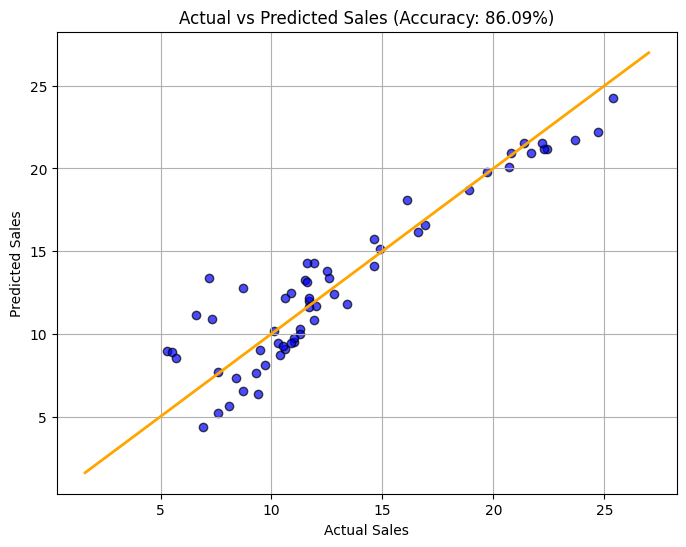

In [4]:
# Visualizations for Model Analysis
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', lw=2, linestyle='-')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales (Accuracy: {r2*100:.2f}%)')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')

**MLDL Exp 1 - Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the Dataset
df = pd.read_csv('breast_cancer.csv')

# Preprocessing: Drop unnecessary columns and encode target
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model without Hyperparameters
model_default = LogisticRegression(max_iter=10000)
model_default.fit(X_train_scaled, y_train)
y_pred_default = model_default.predict(X_test_scaled)

# Metrics Function
def print_metrics(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"--- {title} ---")
    print(f"Accuracy:  {acc:.4f} ({acc*100:.2f}%)")
    print(f"Precision: {prec:.4f} ({prec*100:.2f}%)")
    print(f"Recall:    {rec:.4f} ({rec*100:.2f}%)")
    print(f"F1 Score:  {f1:.4f} ({f1*100:.2f}%)")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}\n")

print_metrics(y_test, y_pred_default, "Performance Without Hyperparameters")

--- Performance Without Hyperparameters ---
Accuracy:  0.9825 (98.25%)
Precision: 0.9688 (96.88%)
Recall:    0.9841 (98.41%)
F1 Score:  0.9764 (97.64%)
TP: 62, TN: 106, FP: 2, FN: 1



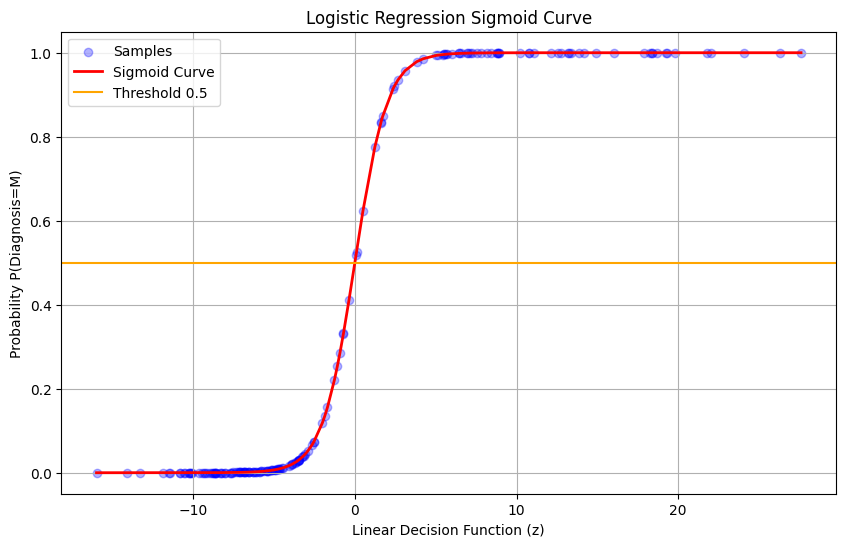

In [2]:
# Sigmoid Curve Visualization
# z = b0 + b1*x1 + ... (the linear combination)
z = model_default.decision_function(X_test_scaled)
probabilities = model_default.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
sort_idx = np.argsort(z)
plt.scatter(z, probabilities, color='blue', alpha=0.3, label='Samples')
plt.plot(z[sort_idx], probabilities[sort_idx], color='red', linewidth=2, label='Sigmoid Curve')
plt.axhline(0.5, color='orange', linestyle='-', label='Threshold 0.5')
plt.xlabel('Linear Decision Function (z)')
plt.ylabel('Probability P(Diagnosis=M)')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.savefig('sigmoid_curve.png')

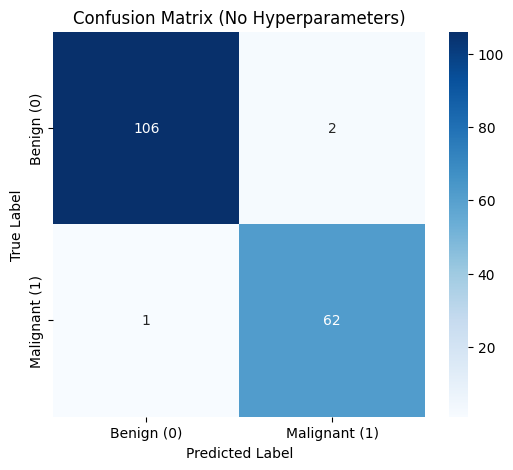

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and matrix
y_pred_default = model_default.predict(X_test_scaled)
cm_default = confusion_matrix(y_test, y_pred_default)

# Plotting the diagram
plt.figure(figsize=(6, 5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix (No Hyperparameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('cm_no_hyperparameters.png')

In [3]:
# Model with Hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

print_metrics(y_test, y_pred_tuned, "Performance With Hyperparameters")
print("Best Hyperparameters:", grid_search.best_params_)

--- Performance With Hyperparameters ---
Accuracy:  0.9942 (99.42%)
Precision: 1.0000 (100.00%)
Recall:    0.9841 (98.41%)
F1 Score:  0.9920 (99.20%)
TP: 62, TN: 108, FP: 0, FN: 1

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


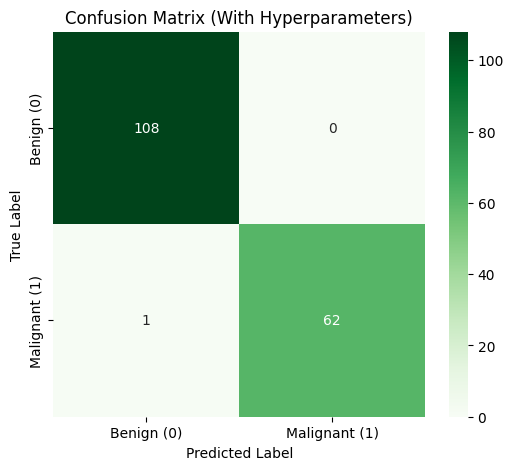

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the tuned model
y_pred_tuned = best_model.predict(X_test_scaled)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plotting the diagram
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix (With Hyperparameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('cm_with_hyperparameters.png')